**Data Distribution For Train**

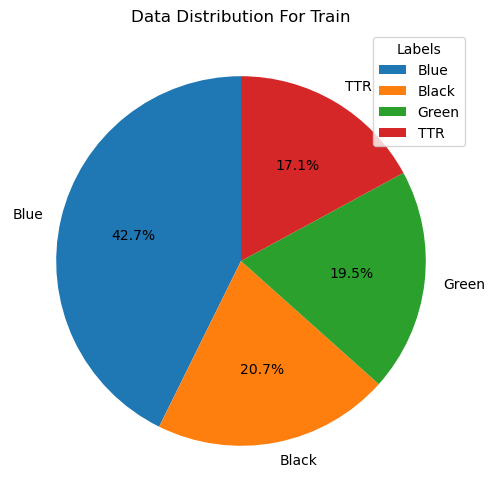

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Define paths for each dataset partition
train_path = 'Home/dataset/train_image_data.csv'
test_path = 'Home/dataset/test_image_data.csv'
val_path = 'Home/dataset//val_image_data.csv'

#Load the CSV file into a DataFrame
df = pd.read_csv(train_path)

#Count the occurrences of each label
label_counts = df['label'].value_counts()


#Generate a pie chart with legend
plt.figure(figsize=(6, 6))
ax = label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=label_counts.index)
plt.title('Data Distribution For Train')
plt.ylabel('')  # To hide the ylabel
plt.legend(title="Labels", labels=label_counts.index, loc='upper right')  # Add legend
plt.show()

**Data Distribution For Test**

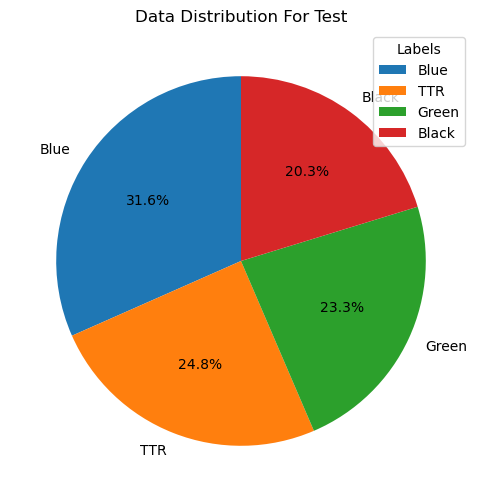

In [2]:
#Load the CSV file into a DataFrame
df = pd.read_csv(test_path)

#Count the occurrences of each label
label_counts = df['label'].value_counts()


#Generate a pie chart with legend
plt.figure(figsize=(6, 6))
ax = label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=label_counts.index)
plt.title('Data Distribution For Test')
plt.ylabel('')  # To hide the ylabel
plt.legend(title="Labels", labels=label_counts.index, loc='upper right')  # Add legend
plt.show()

**Data Distribution For Validation**

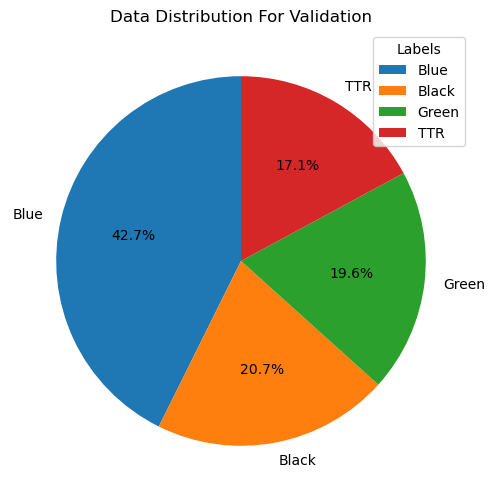

In [3]:
#Load the CSV file into a DataFrame
df = pd.read_csv(val_path)

#Count the occurrences of each label
label_counts = df['label'].value_counts()


#Generate a pie chart with legend
plt.figure(figsize=(6, 6))
ax = label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=label_counts.index)
plt.title('Data Distribution For Validation')
plt.ylabel('')  # To hide the ylabel
plt.legend(title="Labels", labels=label_counts.index, loc='upper right')  # Add legend
plt.show()

**Class Distribution Over Train, Test, and Validation**

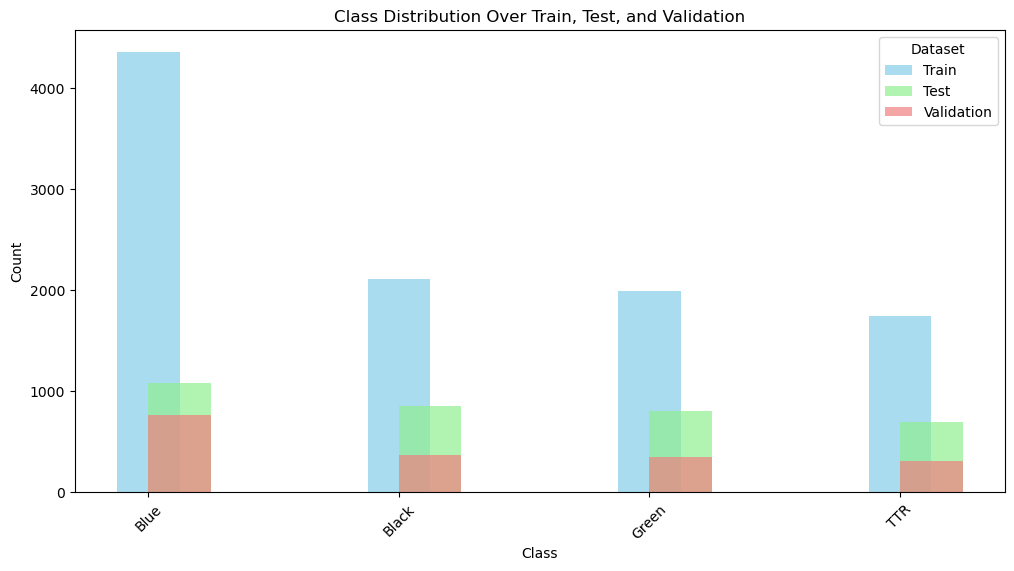

In [4]:
#Load the CSV files into DataFrames
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
val_df = pd.read_csv(val_path)

# Count the occurrences of each label in train, test, and val datasets
train_counts = train_df['label'].value_counts()
test_counts = test_df['label'].value_counts()
val_counts = val_df['label'].value_counts()

# Plot the class distribution for each dataset
labels = train_counts.index

# Bar plot for Train, Test, and Validation set class distributions
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the distributions
ax.bar(labels, train_counts, label='Train', alpha=0.7, color='skyblue', width=0.25, align='center')
ax.bar(labels, test_counts, label='Test', alpha=0.7, color='lightgreen', width=0.25, align='edge')
ax.bar(labels, val_counts, label='Validation', alpha=0.7, color='lightcoral', width=0.25, align='edge')

# Title and labels
plt.title('Class Distribution Over Train, Test, and Validation')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title="Dataset")
plt.xticks(rotation=45)

plt.show()

**Each Class Distribution**

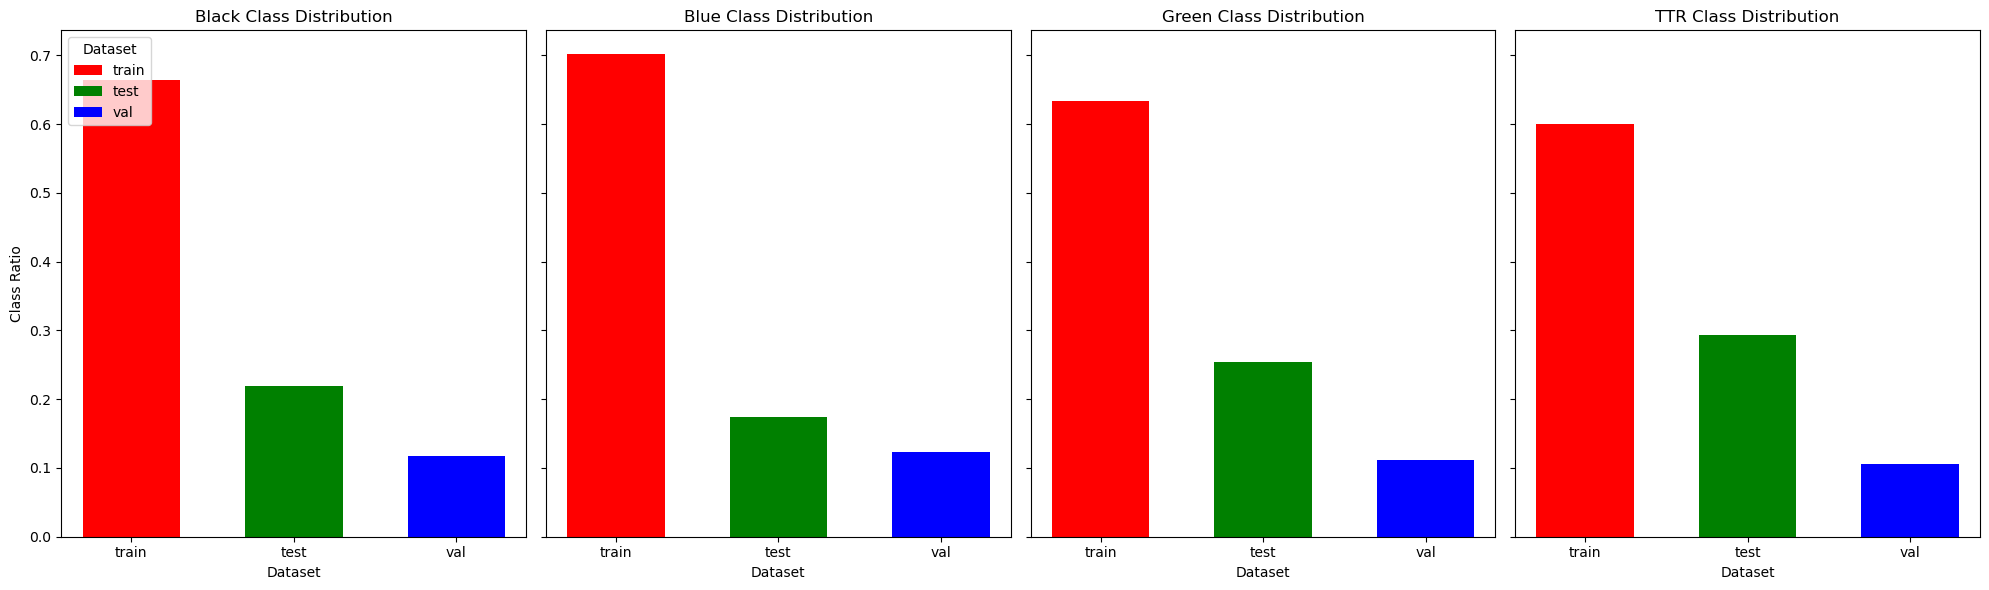

In [5]:
# Count the occurrences of each label in train, test, and val datasets
train_counts = train_df['label'].value_counts()
test_counts = test_df['label'].value_counts()
val_counts = val_df['label'].value_counts()

# Combine the counts into a single DataFrame for easier handling
class_counts = pd.DataFrame({
    'train': train_counts,
    'test': test_counts,
    'val': val_counts
})

# Calculate the total count of each class across all datasets (train, test, val)
total_class_counts = class_counts.sum(axis=1)

# Calculate the ratio of each class in each dataset
df_ratios = class_counts.div(total_class_counts, axis=0)  # Divide each dataset's class count by the total class count

# Define colors for each dataset
dataset_colors = {'train': 'red', 'test': 'green', 'val': 'blue'}

# Create a figure with subplots for each class
fig, axes = plt.subplots(1, len(df_ratios.index), figsize=(20, 6), sharey=True) 


# Plot each class ratio across the train, test, and val datasets
for i, class_name in enumerate(df_ratios.index):
    # Set bar colors for each dataset
    bars = axes[i].bar(df_ratios.columns, df_ratios.loc[class_name],
                       color=[dataset_colors[set_name] for set_name in df_ratios.columns], width=0.6)

    # Add labels and title
    axes[i].set_title(f'{class_name} Class Distribution')
    axes[i].set_xlabel('Dataset')
    if i == 0:
        axes[i].set_ylabel('Class Ratio')  # Only label the y-axis on the first plot

    # Add legend to the first subplot only to avoid repetition
    if i == 0:
        axes[i].legend(bars, df_ratios.columns, title="Dataset", loc="upper left")

# Adjust layout for spacing and prevent overlap
plt.tight_layout()

# Show the plot
plt.show()



**Class Ratios Across Datasets in Table**

In [6]:
from tabulate import tabulate

# Combine the counts into a single DataFrame 
class_counts = pd.DataFrame({
    'train': train_counts,
    'test': test_counts,
    'val': val_counts
})

# Calculate the total count of images for each dataset (train, test, val)
total_counts = class_counts.sum(axis=0)

# Calculate the ratio per class in each dataset
df_ratio = class_counts.div(total_counts, axis=1)  # Divide each class count by the total count of each dataset

# Use tabulate to print the DataFrame as a table
print("Class Ratios Across Datasets:\n")
print(tabulate(df_ratio.round(2), headers='keys', tablefmt='pretty'))

Class Ratios Across Datasets:

+-------+-------+------+------+
| label | train | test | val  |
+-------+-------+------+------+
| Black | 0.21  | 0.2  | 0.21 |
| Blue  | 0.43  | 0.32 | 0.43 |
| Green |  0.2  | 0.23 | 0.2  |
|  TTR  | 0.17  | 0.25 | 0.17 |
+-------+-------+------+------+


**Confusion Matrix**

In [7]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Load the data
data = pd.read_csv("test_results.csv")  

# Assuming the CSV has columns named 'prediction' and 'truth'
y_pred = data['prediction']
y_true = data['truth']

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_normalized = confusion_matrix(y_true, y_pred, normalize='true')

# Retrieve class names from unique values in y_true or y_pred 
class_names = sorted(data['truth'].unique())  # Use sorted() to ensure consistent order

# Display classification report (precision, recall, F1-score)
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

       Black       0.73      0.77      0.75       695
        Blue       0.82      0.89      0.85      1085
       Green       0.93      0.93      0.93       799
         TTR       0.89      0.76      0.82       852

    accuracy                           0.84      3431
   macro avg       0.84      0.84      0.84      3431
weighted avg       0.85      0.84      0.84      3431



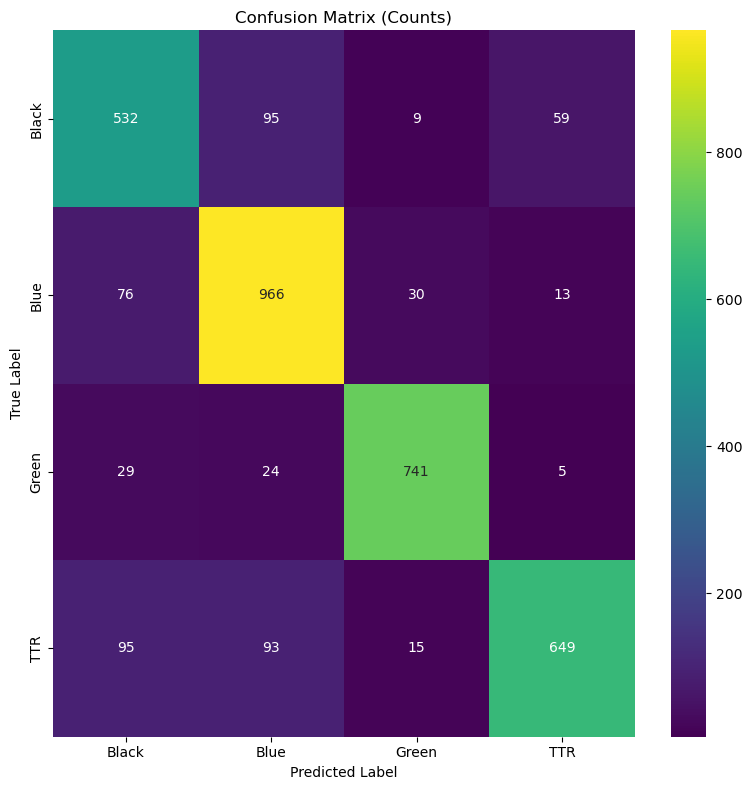

In [8]:
# Plot the non-normalized confusion matrix
plt.figure(figsize=(8, 8))

#Non-normalized confusion matrix
plt.plot(1, 2)
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", cbar=True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Counts)")



plt.tight_layout()
plt.show()

**Normalized confusion matrix**

Text(0.5, 1.0, 'Confusion Matrix (Normalized)')

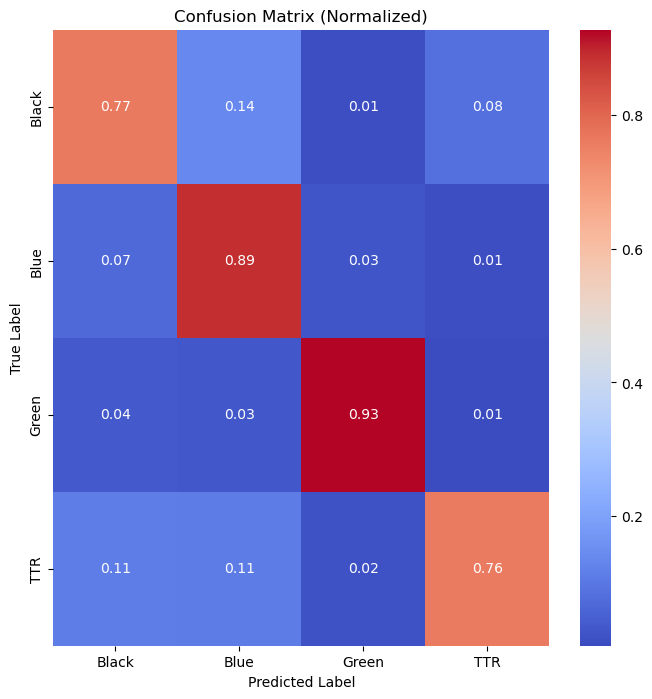

In [9]:
# Plot the non-normalized confusion matrix
plt.figure(figsize=(8, 8))


# Normalized confusion matrix
plt.plot(1, 2)
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,  xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized)")

**Class Performance Comparison (Radar Chart)**

The Radar Chart which is given below, represents the performance of the model for four classes. The four classes are black, blue, green and TTR. Precision, Recall and F1-Score are plotted as radial axes and each class is represented by a different shape on the radial axes.

Precision: Precision evaluates the model's capabilities to accurately identify the specific scenario of each class. Here, we can see that the green class has the highest precision which indicates that predictions for this class are much more accurate.

Recall: Recall basically represents how well the model can capture every relevant scenario. In this case, blue correctly identifies the majority of it’s class instances and achieves the highest recall.

F1-Score: F1-Score provides the model's performance accurately by combining precision and recall. Here, green has the highest F1-Score, indicating that it is the best performing class.




In [10]:
import plotly.graph_objects as go

# Prepare data for radar chart
categories = ['Precision', 'Recall', 'F1-Score']
classes = ['Black', 'Blue', 'Green', 'TTR']
values = [
    [0.7268, 0.7655, 0.7456],  # Black
    [0.8200, 0.8903, 0.8537],  # Blue
    [0.9321, 0.9274, 0.9297],  # Green
    [0.8939, 0.7617, 0.8226]   # TTR
]

fig = go.Figure()

for i, class_name in enumerate(classes):
    fig.add_trace(go.Scatterpolar(
        r=values[i],
        theta=categories,
        fill='toself',
        name=class_name
    ))

# Update layout to reduce the figure size
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1])
    ),
    showlegend=True,
    title="Class Performance Comparison",
    width=500,  # Set width
    height=500  # Set height
)

fig.show()


**Class-wise Performance Metrics (Precision, Recall, F1-Score)**

The model’s performances on three classes ((Black, Blue, Green, and TTR) are represented through the bar charts using Precision, Recall, and F1-Score.

Precision: Precision displays the percentage of true positives. Green class (93.21%) gains the highest precision. On the other hand, black class yields the lowest precision, which is 72.68%. In this case, green prediction is more accurate than others

Recall: Recall basically evaluates the model capacity. Here the highest recall is 89.03%, which is achieved by Blue but TTR class has the relatively lowest precision (76.17%), which indicates that some relevant cases might have gone overlooked.

F1-Score: Green Class achieves the highest F1-Score, which is 92.97%, other than Blue and TTR. On the other hand, black has the lowest F1-Score among others.


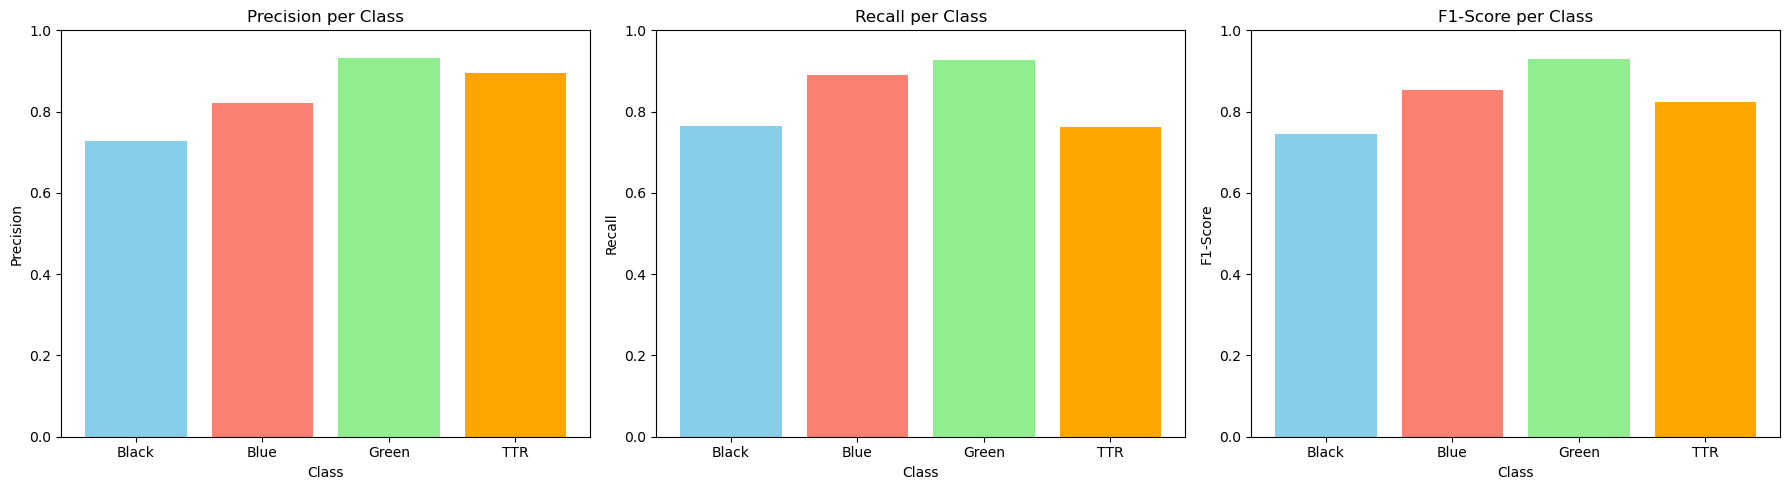

In [11]:
# Data extracted from the JSON
data = {
    'Class': ['Black', 'Blue', 'Green', 'TTR'],
    'Precision': [0.7268, 0.8200, 0.9321, 0.8939],
    'Recall': [0.7655, 0.8903, 0.9274, 0.7617],
    'F1-Score': [0.7456, 0.8537, 0.9297, 0.8226]
}

df = pd.DataFrame(data)

# Plotting Precision, Recall, and F1-Score for each class
metrics = ['Precision', 'Recall', 'F1-Score']
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    ax[i].bar(df['Class'], df[metric], color=['skyblue', 'salmon', 'lightgreen', 'orange'])
    ax[i].set_title(f'{metric} per Class')
    ax[i].set_xlabel('Class')
    ax[i].set_ylabel(metric)
    ax[i].set_ylim(0, 1)  

plt.tight_layout()
plt.show()


**Overall Model Performance (Line Plot)**

An in-depth analysis of the model’s overall performance over a number of metrics is evaluated and represented by a line plot. Each point on the line displays an individual measure. Score values are shown in the y-axis, which range from 0 to 1.

Accuracy: The overall accuracy score of the model is 84.17%. So, it can be easily said that the model can correctly classify samples for all classes.

Macro and Weighted Precision, Recall, and F1-Score: These metrics offers more information, such as Macro Average, which considers every class equally despite their sample size. In this case,  84.32% and 83.62% are the scores of precision and recall.

Weighted average indicates that classes that have more instances are given more weight.

In this case, weighted precision, recall, and F1-score all higher than 84% with weighted precision standing out at 84.56%.

This analysis indicates a model performance with balance where good precision and recall both are presented.


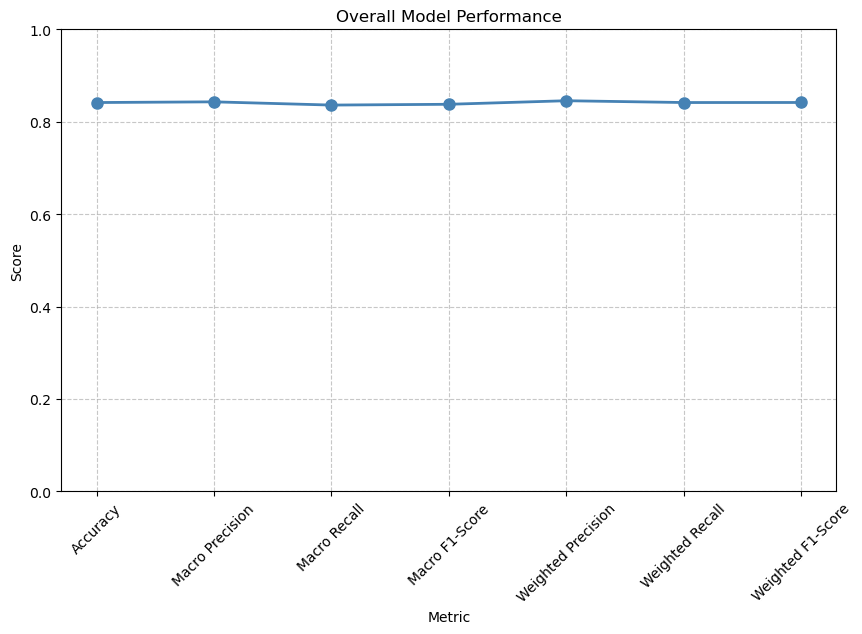

In [12]:
# Data
overall_metrics = {
    'Metric': ['Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1-Score', 'Weighted Precision', 'Weighted Recall', 'Weighted F1-Score'],
    'Score': [0.8417, 0.8432, 0.8362, 0.8379, 0.8456, 0.8417, 0.8418]
}

df_overall = pd.DataFrame(overall_metrics)

# Plotting with a line plot
plt.figure(figsize=(10, 6))
plt.plot(df_overall['Metric'], df_overall['Score'], marker='o', color='steelblue', linestyle='-', linewidth=2, markersize=8)
plt.ylim(0, 1)  # Scores are probabilities
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Overall Model Performance')
plt.xticks(rotation=45)  
plt.grid(visible=True, linestyle='--', alpha=0.7)

plt.show()

In [13]:
import json
from IPython.display import display

# Load JSON data
with open('Home/results/resnet_class_report.json', 'r') as file:
    data = json.load(file)

# Extract data for each row
rows = ['Black', 'Blue', 'Green', 'TTR', 'macro avg', 'weighted avg']
table_data = {row: [data[row]['precision'], data[row]['recall'], data[row]['f1-score'], data[row]['support']] for row in rows}

# Create a DataFrame
df = pd.DataFrame.from_dict(table_data, orient='index', columns=['Precision', 'Recall', 'F1-Score', 'Support'])

# Display the DataFrame as a table
display(df)


,Precision,Recall,F1-Score,Support
Black,0.726776,0.765468,0.745620,695.0
Blue,0.820034,0.890323,0.853734,1085.0
Green,0.932075,0.927409,0.929737,799.0
TTR,0.893939,0.761737,0.822560,852.0
macro avg,0.843206,0.836234,0.837913,3431.0
weighted avg,0.845588,0.841737,0.841792,3431.0
